## Load data `application_train.csv`

In [1]:
 ## imports 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,mutual_info_classif,VarianceThreshold,f_classif
from sklearn.base import TransformerMixin , BaseEstimator
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


## 1- Apply first method Basic Statistical Filter Methods for feature selection
  - VarianceThreshod (Remove the Constant Feature and Quasi-Constant Features)
  
**hint: use only numerical columns**

In [2]:
data=pd.read_csv("application_train.csv")
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
data.describe(include=["O"])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [6]:
# to know categories columns :-

data.select_dtypes(include=["object"]).columns

#data.select_dtypes(include=["category"]).columns




Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [7]:
# to know types of data:

data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [8]:
# to detect the continous data , discrete data:

floating_cloumns=data.select_dtypes(include=["float64"]).columns
floating_cloumns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [9]:
integar_columns=data.select_dtypes(include=["int64"]).columns
integar_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [10]:
# to show the sum of the null data:

data.isnull().mean()

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

In [11]:
# fill the null values 

# Load your dataset into a pandas dataframe
df = data

# Fill null values in numeric columns with the median of the column
numeric_cols = df.select_dtypes("number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill null values in object columns with the mode of the column
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].fillna(df[object_cols].mode())

# Save the filled dataset to a new file
# df.to_csv('filled_dataset.csv', index=False)



In [12]:
imputer=SimpleImputer(strategy='mean')
imputer.fit(data["OWN_CAR_AGE"].values.reshape(1,-1))
imputer.transform(data["OWN_CAR_AGE"].values.reshape(1,-1))


array([[ 9.,  9., 26., ...,  9.,  9.,  9.]])

In [13]:
imputer.fit(data["AMT_REQ_CREDIT_BUREAU_DAY"].values.reshape(1,-1))
imputer.transform(data["AMT_REQ_CREDIT_BUREAU_DAY"].values.reshape(1,-1))


array([[0., 0., 0., ..., 0., 0., 0.]])

In [14]:
imputer.fit(data["AMT_REQ_CREDIT_BUREAU_MON"].values.reshape(1,-1))
imputer.transform(data["AMT_REQ_CREDIT_BUREAU_MON"].values.reshape(1,-1))


array([[0., 0., 0., ..., 1., 0., 2.]])

In [15]:
imputer.fit(data["AMT_REQ_CREDIT_BUREAU_WEEK"].values.reshape(1,-1))
imputer.transform(data["AMT_REQ_CREDIT_BUREAU_WEEK"].values.reshape(1,-1))


array([[0., 0., 0., ..., 0., 0., 0.]])

In [16]:
imputer.fit(data["AMT_REQ_CREDIT_BUREAU_QRT"].values.reshape(1,-1))
imputer.transform(data["AMT_REQ_CREDIT_BUREAU_QRT"].values.reshape(1,-1))


array([[0., 0., 0., ..., 0., 0., 0.]])

In [17]:
imputer.fit(data["AMT_REQ_CREDIT_BUREAU_YEAR"].values.reshape(1,-1))
imputer.transform(data["AMT_REQ_CREDIT_BUREAU_YEAR"].values.reshape(1,-1))


array([[1., 0., 0., ..., 1., 0., 1.]])

In [22]:
data.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [18]:
num_cols=data.select_dtypes(include=["number"]).columns
num_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [19]:
# Aim from this data set:=> detect if the customer able to pay or not the loans

# Target:=> 0=>not pay , 1=> pay

In [20]:
data["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [21]:
data.select_dtypes(include=["int64"]).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [22]:
data.select_dtypes(include=["float64"])

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,9.0,1.0,0.083037,0.262949,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,9.0,2.0,0.311267,0.622246,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,0.505998,0.555912,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,9.0,2.0,0.505998,0.650442,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,9.0,1.0,0.505998,0.322738,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,9.0,1.0,0.145570,0.681632,...,0.0,0.0,0.0,-273.0,0.0,0.0,0.0,0.0,0.0,1.0
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,9.0,1.0,0.505998,0.115992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,9.0,1.0,0.744026,0.535722,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,9.0,2.0,0.505998,0.514163,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
data.select_dtypes(include=["category"])

""
0
1
2
3
4
...
307506
307507
307508
307509


In [24]:
data.select_dtypes("object")

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


<AxesSubplot:ylabel='CODE_GENDER'>

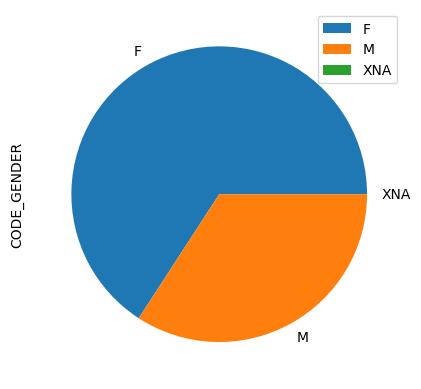

In [26]:
data["CODE_GENDER"].value_counts().plot(kind="pie",legend=True)

<AxesSubplot:>

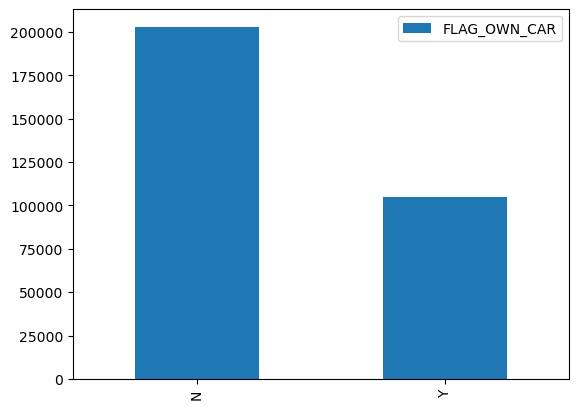

In [27]:
data["FLAG_OWN_CAR"].value_counts().plot(kind="bar",legend=True)

<AxesSubplot:ylabel='Frequency'>

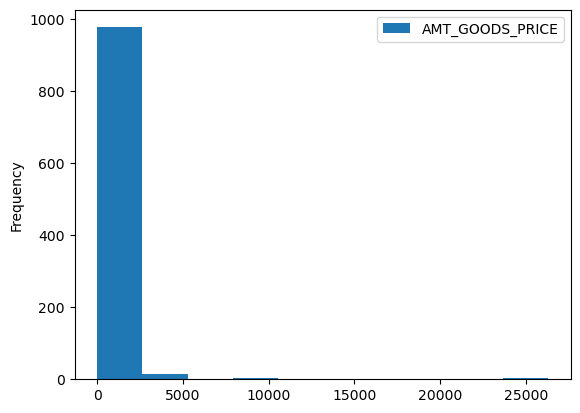

In [29]:
data["AMT_GOODS_PRICE"].value_counts().plot(kind="hist",legend=True)

In [30]:
data.select_dtypes(include=["object"]).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

<AxesSubplot:xlabel='CODE_GENDER'>

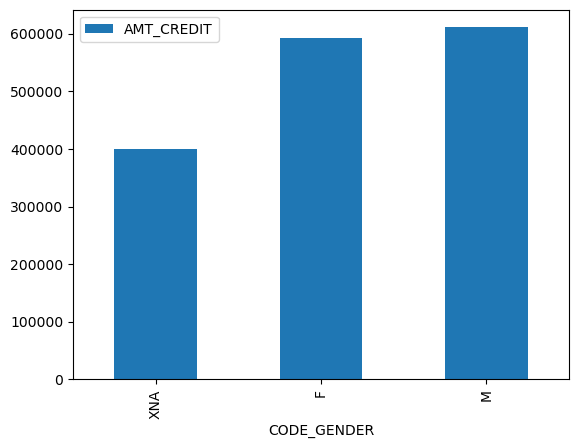

In [31]:
data.groupby(["CODE_GENDER"])["AMT_CREDIT"].mean().sort_values(ascending=True).plot(kind="bar",legend=True)

<AxesSubplot:ylabel='CODE_GENDER'>

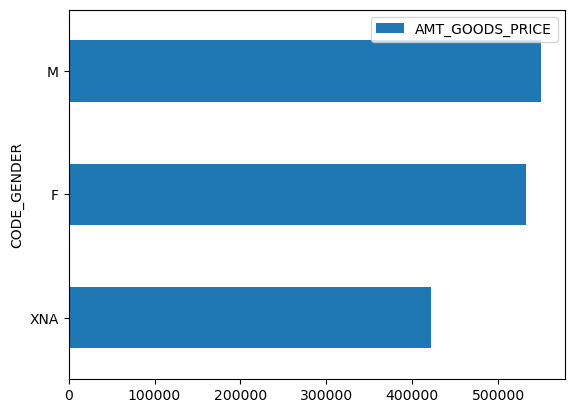

In [32]:
data.groupby(["CODE_GENDER"])["AMT_GOODS_PRICE"].mean().sort_values(ascending=True).plot(kind="barh",legend=True)

## 2- Correlation & Ranking based statistical Filter Methods
  - Pearson’s correlation coefficient
  - Spearman’s rank coefficient
  
 **hint:**
 - use only numerical columns
 - you can use `sns.heatmap()` to plot correlation matrix

In [33]:
num_cols=data.select_dtypes("number").columns
num_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

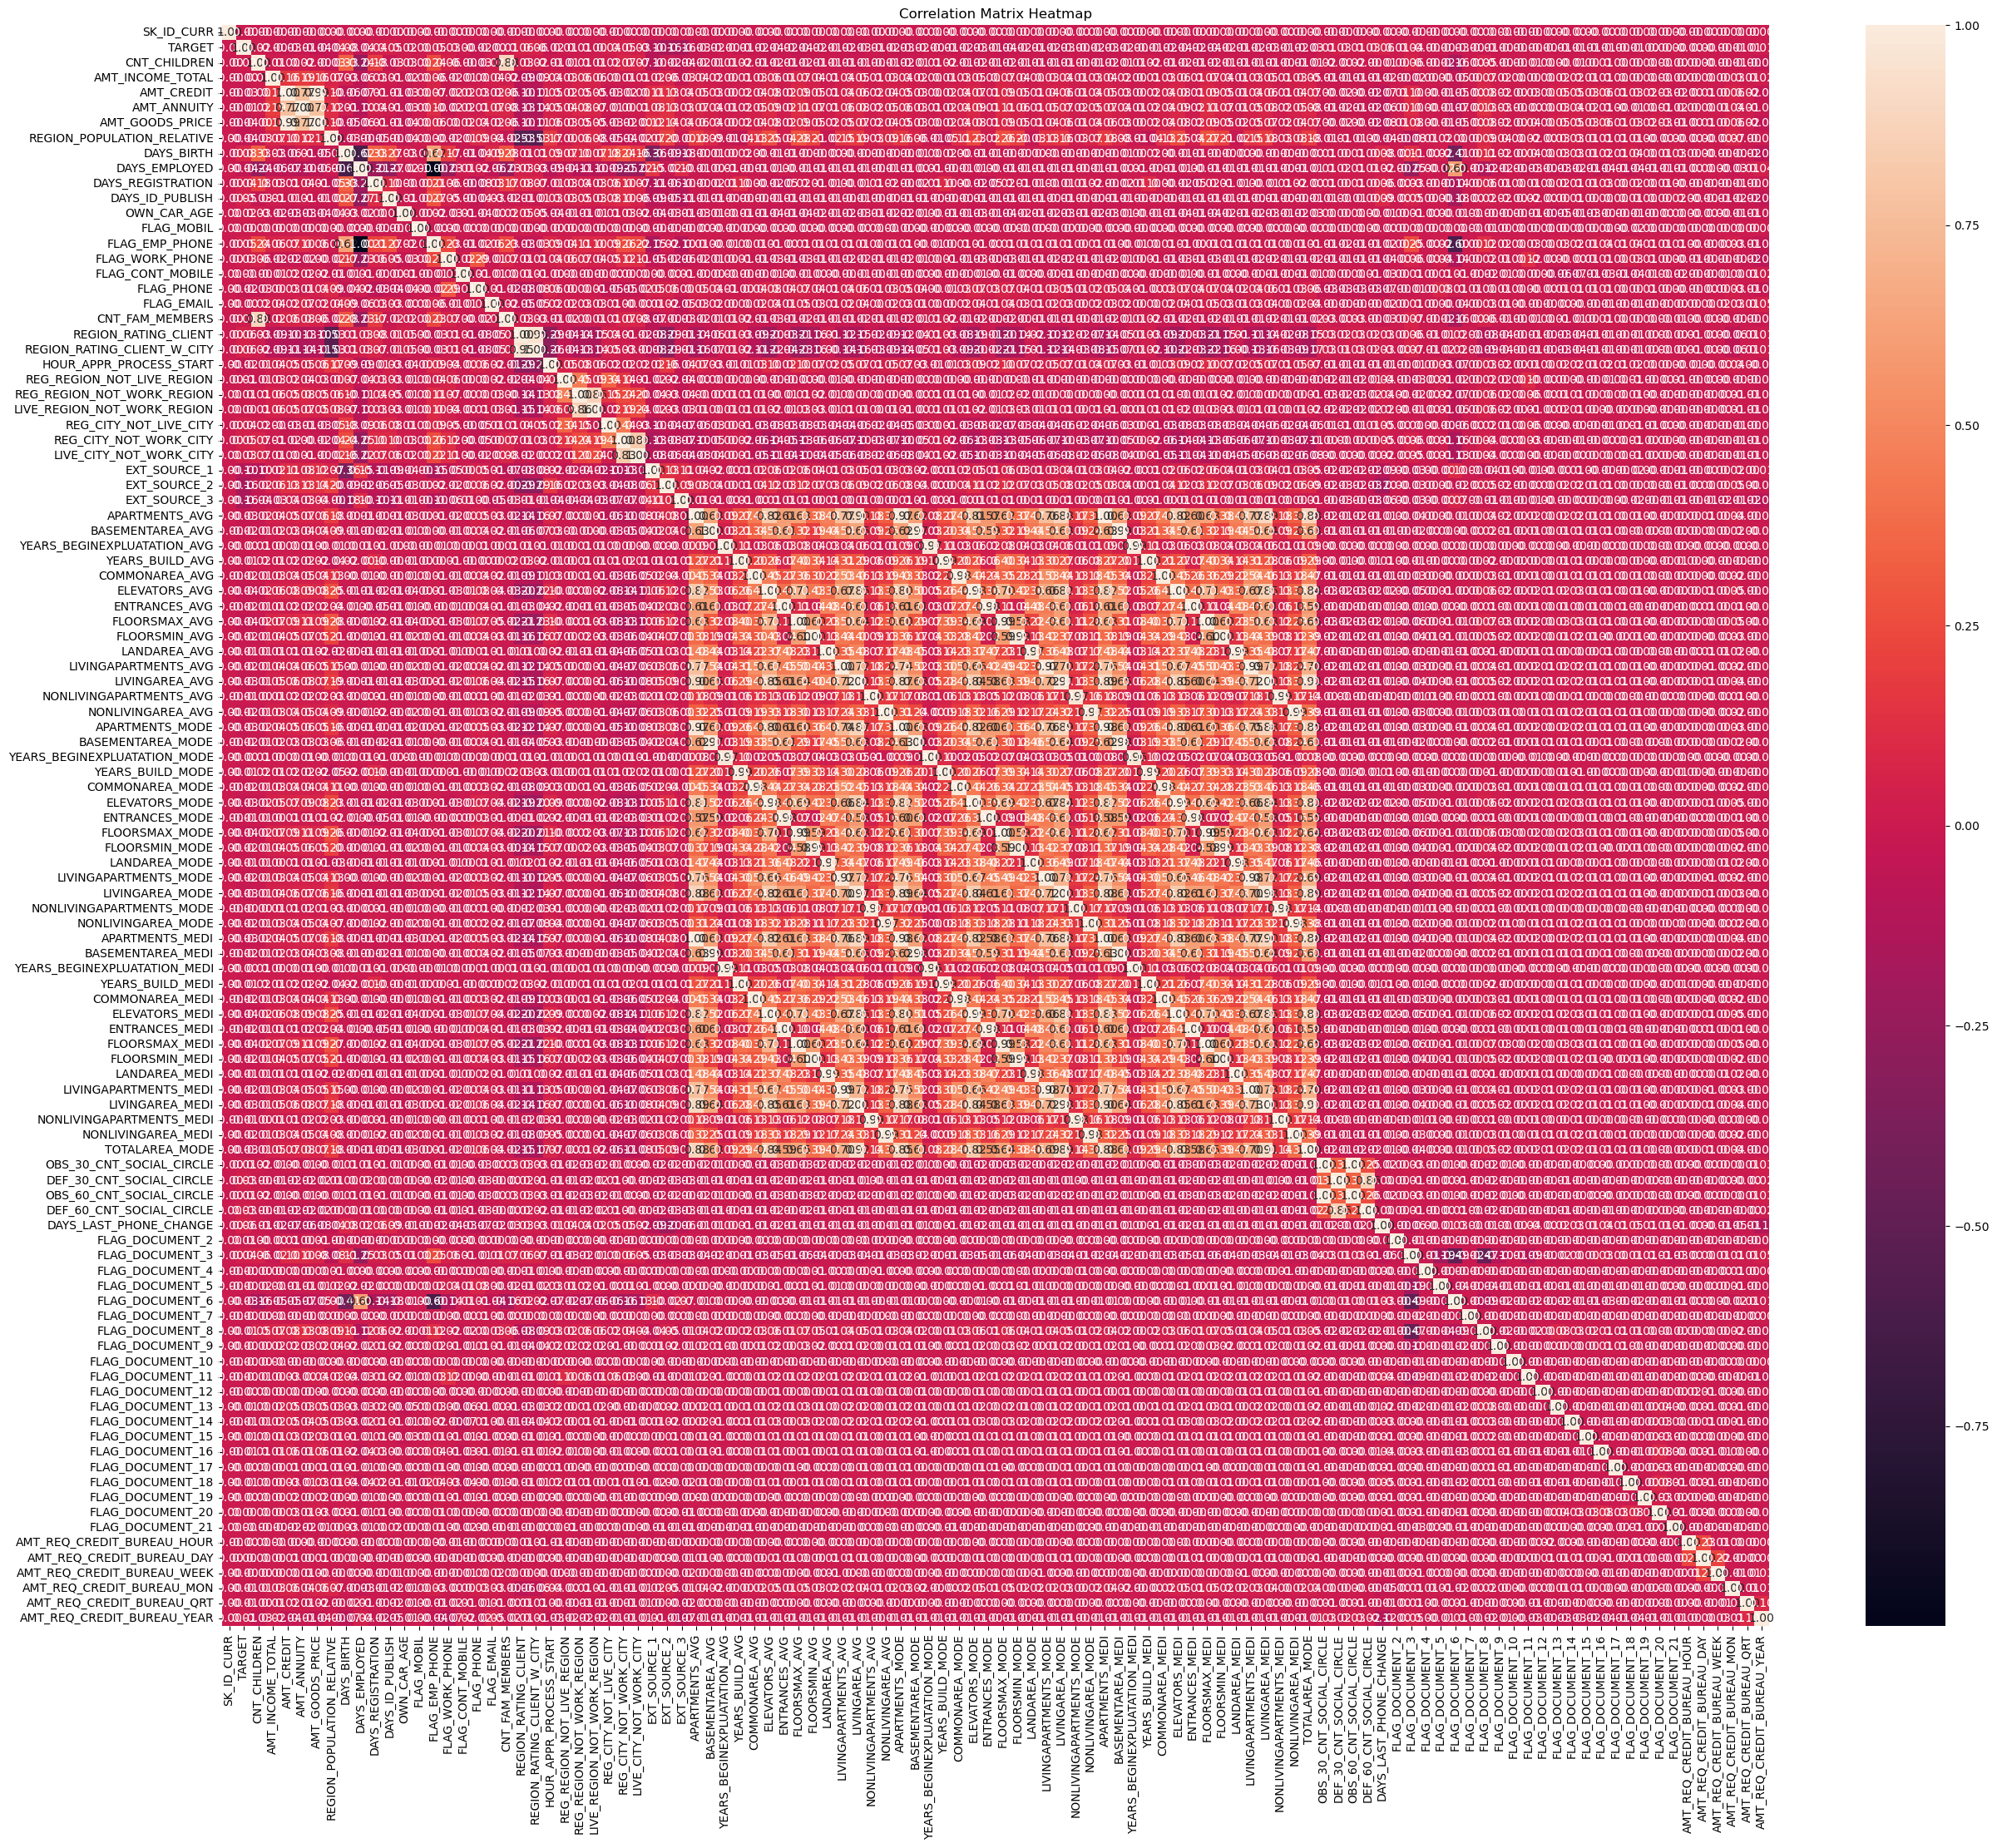

In [37]:
plt.figure(figsize=(30,25))
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt=".2f" )
plt.title('Correlation Matrix Heatmap')
plt.show()

In [35]:
data.select_dtypes("number").corr(method="spearman")

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002111,-0.000787,0.002160,0.000117,0.000375,0.000469,0.000868,-0.001610,0.000464,...,0.000513,0.000167,0.001070,0.000283,-0.001712,-0.002774,0.002856,0.000598,-0.000995,0.004583
TARGET,-0.002111,1.000000,0.020074,-0.018104,-0.017537,-0.000073,-0.031488,-0.030562,0.078328,0.025182,...,-0.007952,-0.001358,0.000215,0.003709,-0.000043,0.003573,-0.001525,-0.011378,-0.013514,0.013061
CNT_CHILDREN,-0.000787,0.020074,1.000000,0.034464,0.001656,0.025454,-0.002587,-0.026705,0.367441,-0.157696,...,0.006521,0.000754,0.002439,-0.001159,0.001773,0.000399,-0.000037,0.001237,-0.003989,-0.035935
AMT_INCOME_TOTAL,0.002160,-0.018104,0.034464,1.000000,0.411876,0.481573,0.415589,0.094418,0.083973,-0.171211,...,0.001409,0.008097,0.002638,-0.001041,0.005516,0.007240,0.015002,0.081162,0.039869,0.068480
AMT_CREDIT,0.000117,-0.017537,0.001656,0.411876,1.000000,0.830211,0.984363,0.052884,-0.066139,-0.118499,...,0.023000,0.016385,0.022797,-0.021721,-0.001567,0.001247,-0.000647,0.049306,0.028295,-0.024627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002774,0.003573,0.000399,0.007240,0.001247,0.002427,0.001430,-0.000701,0.001519,0.000500,...,0.007792,0.002137,0.000508,-0.001277,0.229517,1.000000,0.052960,-0.003751,-0.005310,0.004636
AMT_REQ_CREDIT_BUREAU_WEEK,0.002856,-0.001525,-0.000037,0.015002,-0.000647,0.013490,-0.000017,-0.004220,-0.004640,-0.002441,...,-0.008630,-0.000880,-0.002026,0.000149,0.008144,0.052960,1.000000,-0.015981,-0.019468,0.037150
AMT_REQ_CREDIT_BUREAU_MON,0.000598,-0.011378,0.001237,0.081162,0.049306,0.050431,0.050533,0.044376,0.003319,-0.047617,...,-0.007063,-0.002303,0.001536,-0.004435,0.002959,-0.003751,-0.015981,1.000000,-0.007811,0.042015
AMT_REQ_CREDIT_BUREAU_QRT,-0.000995,-0.013514,-0.003989,0.039869,0.028295,0.022391,0.029495,-0.001713,-0.018739,0.003769,...,-0.006371,-0.001450,-0.000517,-0.002873,0.001747,-0.005310,-0.019468,-0.007811,1.000000,0.113302


In [35]:
data.select_dtypes("number").corr(method="pearson")


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000431,-0.000258,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002517,-0.002066,0.001879,0.000328,0.000809,0.004071
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012815,-0.039623,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,-0.000074,0.001701,-0.001306,-0.014794,-0.005833,0.012161
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021377,-0.001856,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,0.000159,0.000107,-0.001083,-0.007983,-0.004913,-0.034874
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159632,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.001432,0.003481,0.003950,0.026746,0.007924,0.015821
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770127,0.986734,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.002366,0.005028,0.001634,0.055536,0.020379,-0.036634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002066,0.001701,0.000107,0.003481,0.005028,0.002286,0.005442,0.001160,0.001018,0.000309,...,0.012956,0.001154,0.000078,-0.001076,0.230873,1.000000,0.218370,-0.002750,-0.001551,0.000742
AMT_REQ_CREDIT_BUREAU_WEEK,0.001879,-0.001306,-0.001083,0.003950,0.001634,0.013494,0.001880,-0.002335,-0.004014,0.002505,...,-0.003666,-0.001006,-0.001239,-0.000057,0.006422,0.218370,1.000000,-0.007423,-0.007466,0.029318
AMT_REQ_CREDIT_BUREAU_MON,0.000328,-0.014794,-0.007983,0.026746,0.055536,0.037171,0.057337,0.071630,-0.003580,-0.032416,...,-0.000179,-0.002230,0.002177,-0.003489,0.002973,-0.002750,-0.007423,1.000000,0.005318,0.013708
AMT_REQ_CREDIT_BUREAU_QRT,0.000809,-0.005833,-0.004913,0.007924,0.020379,0.010685,0.020811,-0.001873,-0.016281,0.013466,...,-0.003362,-0.001079,0.000034,-0.002066,0.000725,-0.001551,-0.007466,0.005318,1.000000,0.095723


In [39]:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))
selector.get_support(indices=True)

array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  14,
        15,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  37,  39,  53,  67,  75,  76,  77,  78,  79,  81,
        83,  84,  86, 101, 102, 103, 104, 105], dtype=int64)

In [40]:
num_cols[selector.get_support(indices=True)]

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'ELEVATORS_AVG', 'FLOORSMAX_AVG',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT

## 3- Extract the 5th most important categorical Feature

**Hint :** use factorize() to encode categorical Feature

```python
cat = pd.Series(['a', 'a', 'c'])
codes, uniques = pd.factorize(cat)
```
```python
codes:
array([0, 0, 1])
```
```python
uniques:
Index(['a', 'c'], dtype='object') 
```

In [ ]:
# select the most 5 features categorical:

from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(data.drop(columns="TARGET").select_dtypes("number").fillna(0),data["TARGET"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="TARGET").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

In [ ]:
# Extract the most important Numerical Feature:
from sklearn.feature_selection import f_classif, SelectKBest

fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="TARGET").select_dtypes("number").fillna(0),data["TARGET"])

In [ ]:
print(["{:10f}".format(p)for p in fs.pvalues_])

In [ ]:
print(["{:10f}".format(p)for p in fs.scores_])

In [ ]:
features_pvalues=pd.DataFrame(fs.pvalues_)
fatures_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="TARGET").select_dtypes("number").fillna(0).columns)
feature_score=pd.concat([features_pvalues,fatures_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

In [ ]:
# End